In [1]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")
titanic

# PassengerId: 승객의 고유 식별자.
# Survived: 생존 여부 (0: 사망, 1: 생존).
# Pclass: 티켓의 클래스 또는 객실 등급 (1, 2, 3).
# Name: 승객의 이름.
# Sex: 성별 (male 또는 female).
# Age: 승객의 나이.
# SibSp: 함께 탑승한 형제자매 또는 배우자의 수.
# Parch: 함께 탑승한 부모 또는 자녀의 수.
# Ticket: 티켓 번호.
# Fare: 지불한 운임 요금.
# Cabin: 객실 번호.
# Embarked: 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton).

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
titanic.to_csv('data/titanic.csv', index = False)

In [3]:
## 경고 메세지 표시 안함
import warnings
warnings.filterwarnings(action='ignore')

##### 데이터 전처리

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
## 결측값 확인

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
## age변수를 중앙값으로 치환

titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
## embarked 열의 결측값을 최빈값으로 치환하기

titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [8]:
titanic['embarked'] = titanic['embarked'].fillna('S')
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
## embark_town 열의 결측값을 최빈값으로 치환하기

titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [10]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [11]:
## deck 열의 결측값을 최빈값으로 치환하기

titanic['deck'] = titanic['deck'].fillna(titanic['deck'].mode().iloc[0])
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
titanic.survived.value_counts()   ## 생존 인원 수

0    549
1    342
Name: survived, dtype: int64

In [14]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(1, 2, figsize = (10, 5))

titanic['survived'][titanic['sex'] == 'male'].value_counts().
            plot.pie(explode = [0,0.1], autopct = '%.1f%%', ax = ax[0], shadow = True)
                # 남성 승객의 생존률
                # explode = [0,0.1] : 두번째 조각의 돌출 정도(0~1사이값)
            
titanic['survived'][titanic['sex'] == 'female'].value_counts().
            plot.pie(explode = [0,0.1], autopct = '%.1f%%', ax = ax[1], shadow = True)
                # 여성 승객의 생존률
        
ax[0].set_title('Survived (Male)')    # 첫번째 차트의 제목
ax[1].set_title('Survived (Female)')  # 두번째 차트의 제목

plt.show()


SyntaxError: invalid syntax (1547796034.py, line 5)

In [15]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


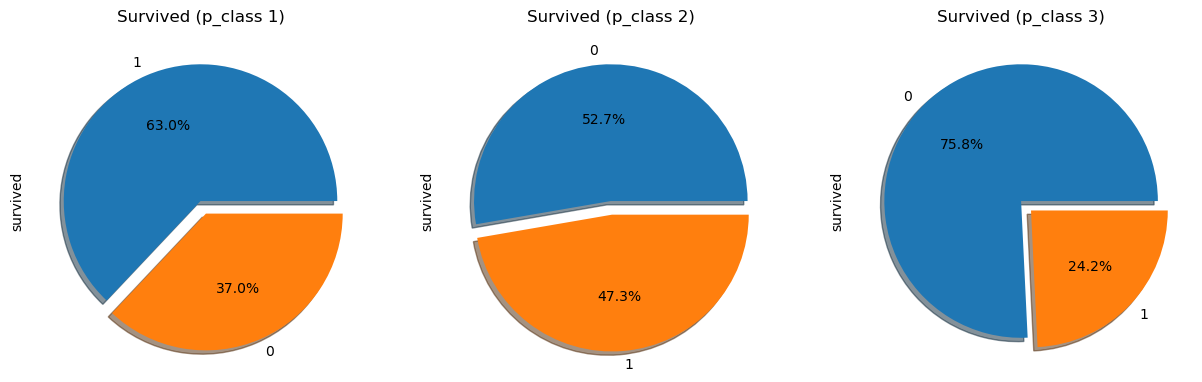

In [16]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(1, 3, figsize = (15, 5))

titanic['survived'][titanic['pclass'] == 1].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%', ax = ax[0], shadow = True)
    
titanic['survived'][titanic['pclass'] == 2].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%', ax = ax[1], shadow = True)
    
titanic['survived'][titanic['pclass'] == 3].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%', ax = ax[2], shadow = True)
    

ax[0].set_title('Survived (p_class 1)')
ax[1].set_title('Survived (p_class 2)')
ax[2].set_title('Survived (p_class 3)')
plt.show()

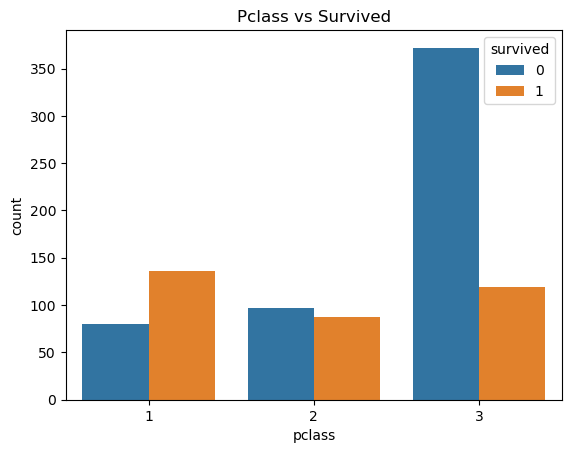

In [17]:
import seaborn as sns

sns.countplot(x='pclass', hue = 'survived', data = titanic) 
                    # pclass유형 1,2,3을 x축으로, survived의 각 개수를 y축으로
                    # countplot : 범주형 데이터의 빈도를 막대 그래프로 시각화

plt.title('Pclass vs Survived')
plt.show()

Text(0.5, 1.0, 'Sex vs Survived')

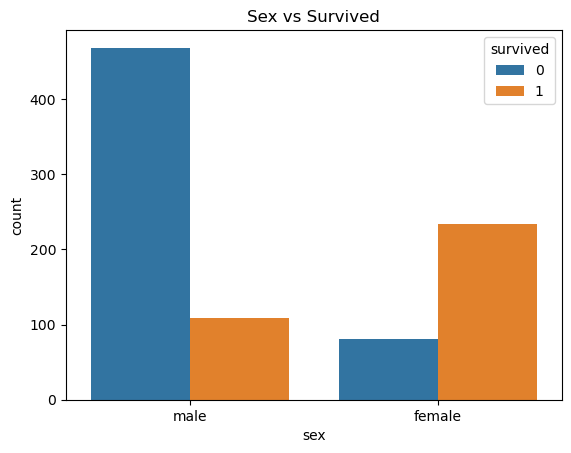

In [18]:
import seaborn as sns

sns.countplot(x='sex', hue = 'survived', data = titanic)
        
plt.title('Sex vs Survived')

##### 데이터모델링

In [19]:
## 상관 계수 구하기

titanic_corr = titanic.corr()  #  (numeric_only=True)
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [20]:
titanic_corr.to_csv('data/titanic_corr.csv')

In [21]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053258

##### 시각화

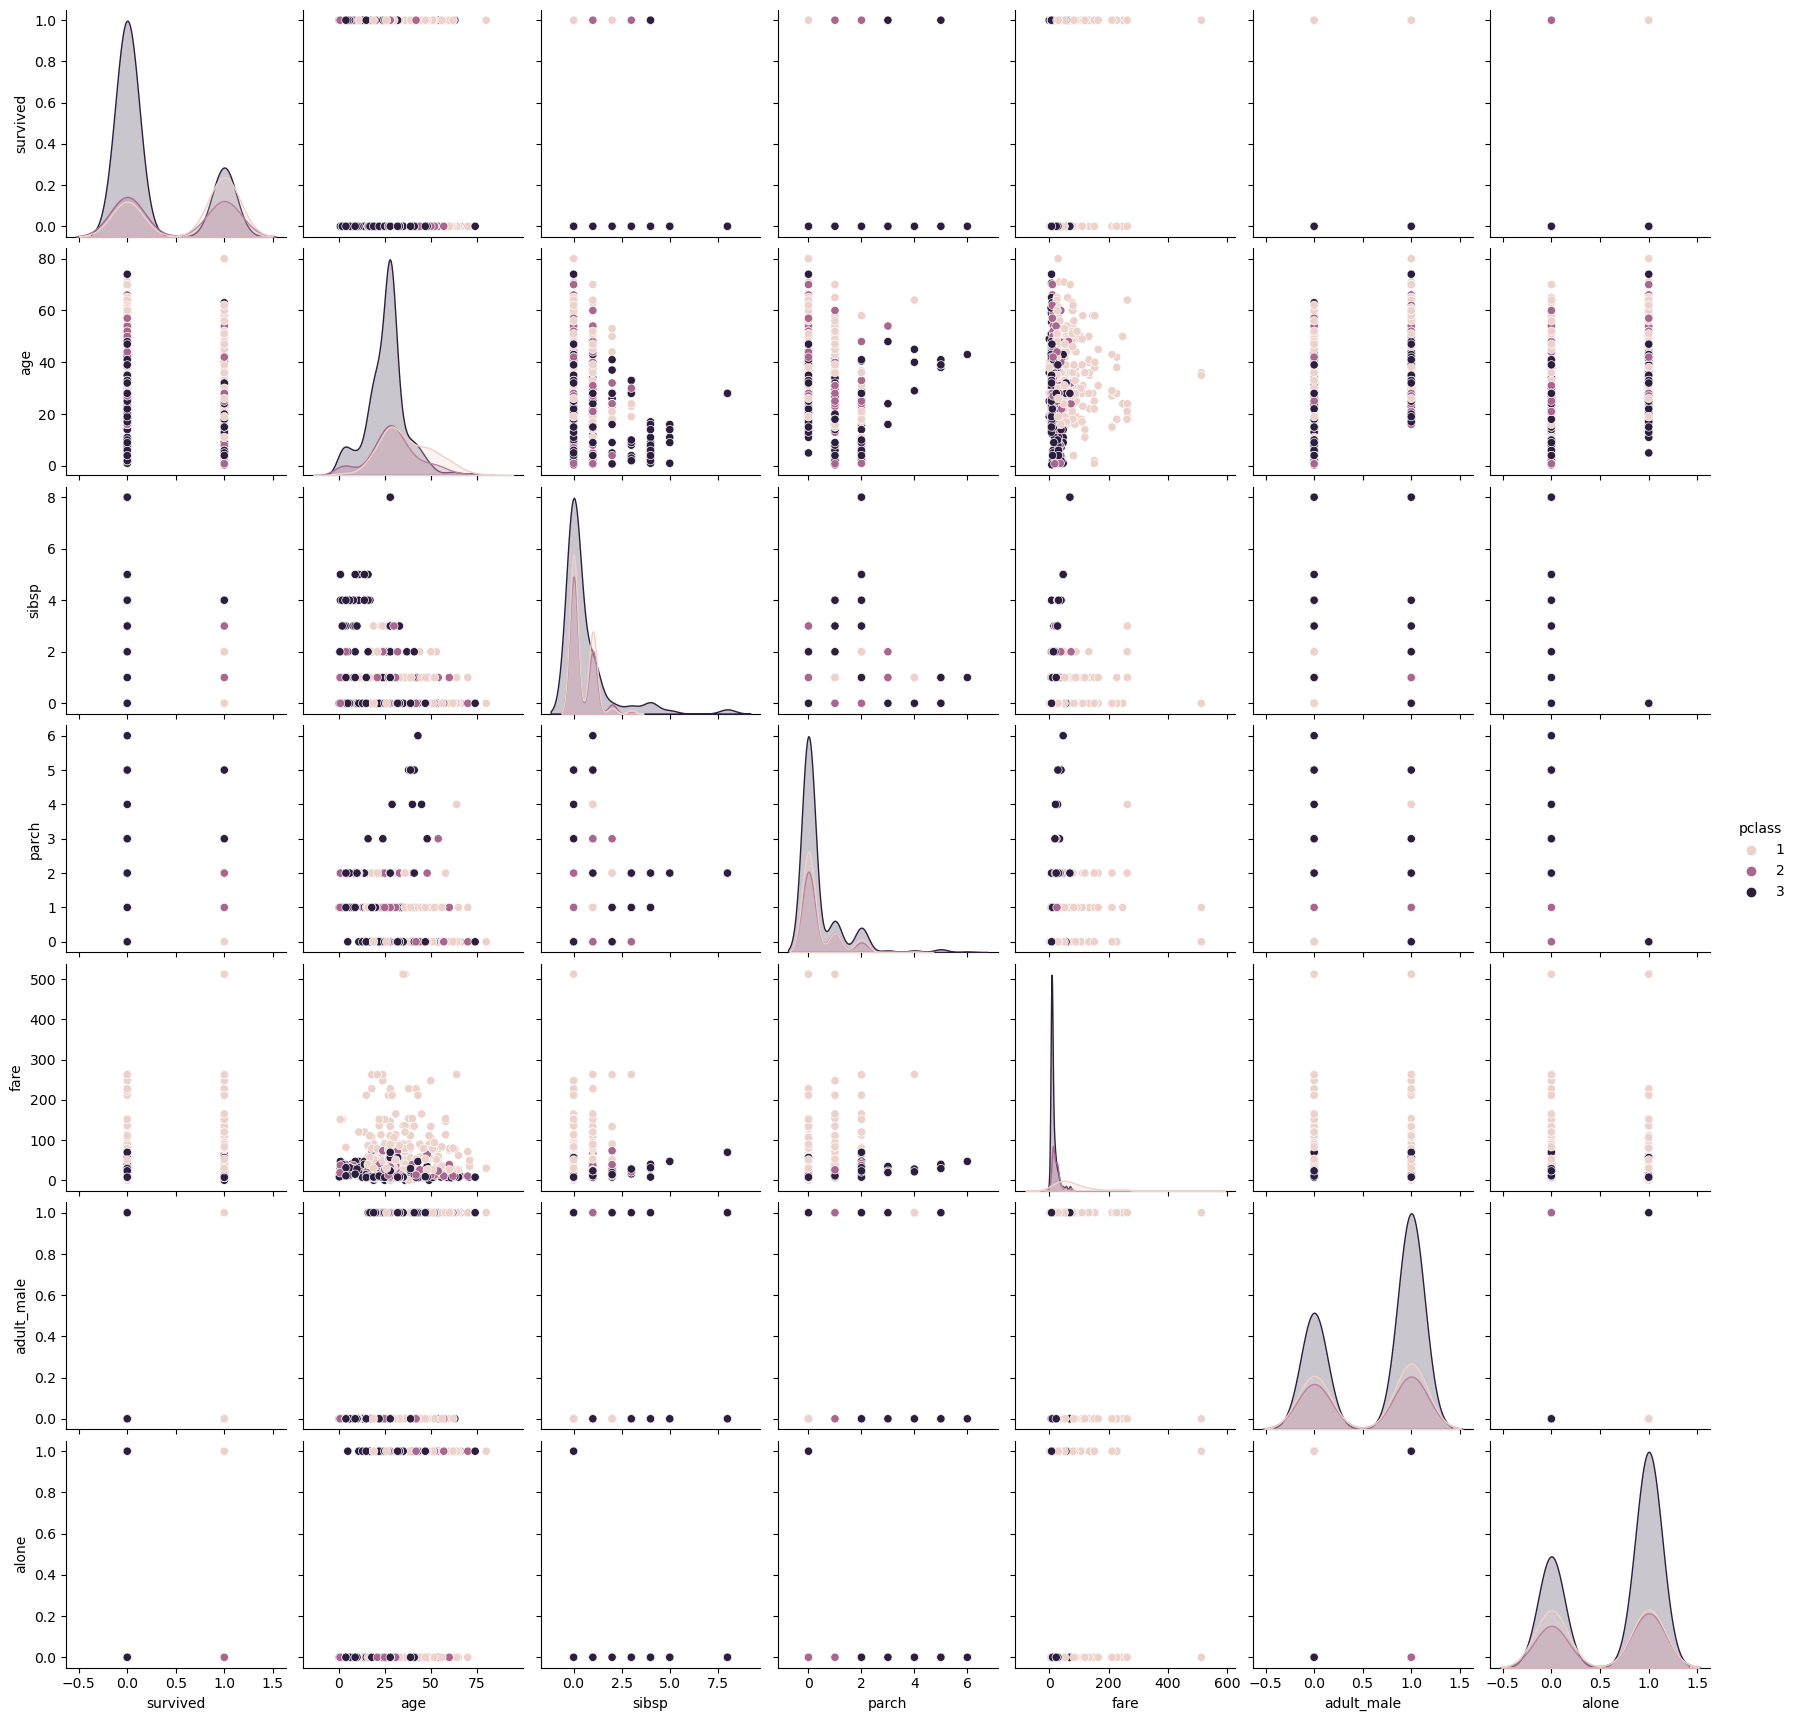

In [22]:
## 산점도

sns.pairplot(titanic, hue = 'pclass')

plt.show()

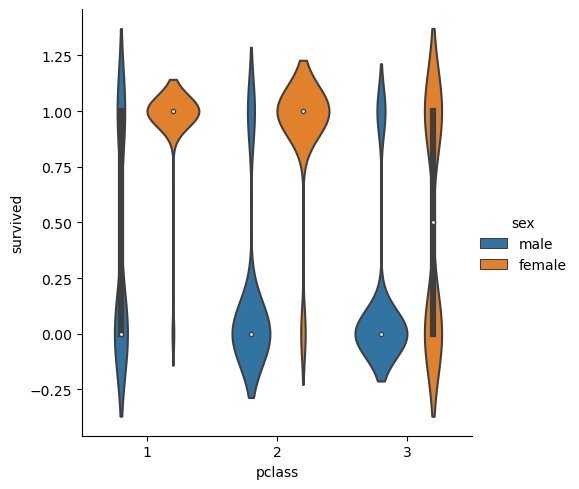

In [23]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'violin')  
# 범주형 데이터를 시각화
# catplot : 범주형 변수들 간의 관계를 확인할 때 활용
# pclass를 x축, survived를 y축으로 설정하고, 성별에 따라 다른 색상으로 점을 
#  찍어 각 클래스와 생존 여부에 대한 관계를 시각화

### kind = 'point' : point 대신, swarm, violin, bar 등을 사용할 수 있다.

plt.show()

In [24]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    

titanic['age2'] = titanic['age'].apply(category_age)  
## 함수를 사용하여 새로운 age2를 추가

titanic    

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2


In [25]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0}) # 성별을 1,0 으로
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2


In [26]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1  
# 가족의 수를 구하여 family열 추가

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2,1
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1
888,0,3,0,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2,4
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2,1


In [28]:
titanic.to_csv('data/titanic3.csv', index = False)

In [29]:
# 히트맵에 사용할 데이터 추출

heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]  
heatmap_data

,survived,sex,age2,family,pclass,fare
0,0,1,2,2,3,7.2500
1,1,0,3,2,1,71.2833
2,1,0,2,1,3,7.9250
3,1,0,3,2,1,53.1000
4,0,1,3,1,3,8.0500
...,...,...,...,...,...,...
886,0,1,2,1,2,13.0000
887,1,0,1,1,1,30.0000
888,0,0,2,4,3,23.4500
889,1,1,2,1,1,30.0000


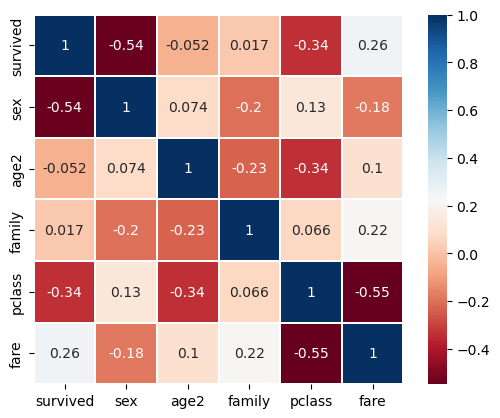

In [30]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, square = True, 
                                cmap = 'RdBu', linecolor = 'white', annot = True)

plt.show()